In [5]:
# Bibliotecas base
import pandas as pd
from matplotlib import pyplot as plt

# Plotagem com Plotly Express
import plotly.express as px
import seaborn as sns

In [2]:
# Exibir o máximo de linhas e colunas
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [2]:
# Leitura do arquivo 'vgsales.csv'
df = pd.read_csv('vgsales.csv', encoding='utf-8', index_col=0)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
# Quantidade de dados da base de dados
df.shape

(16598, 10)

In [4]:
# Exibe a soma dos dados nulos encontrados por coluna
df.isnull().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

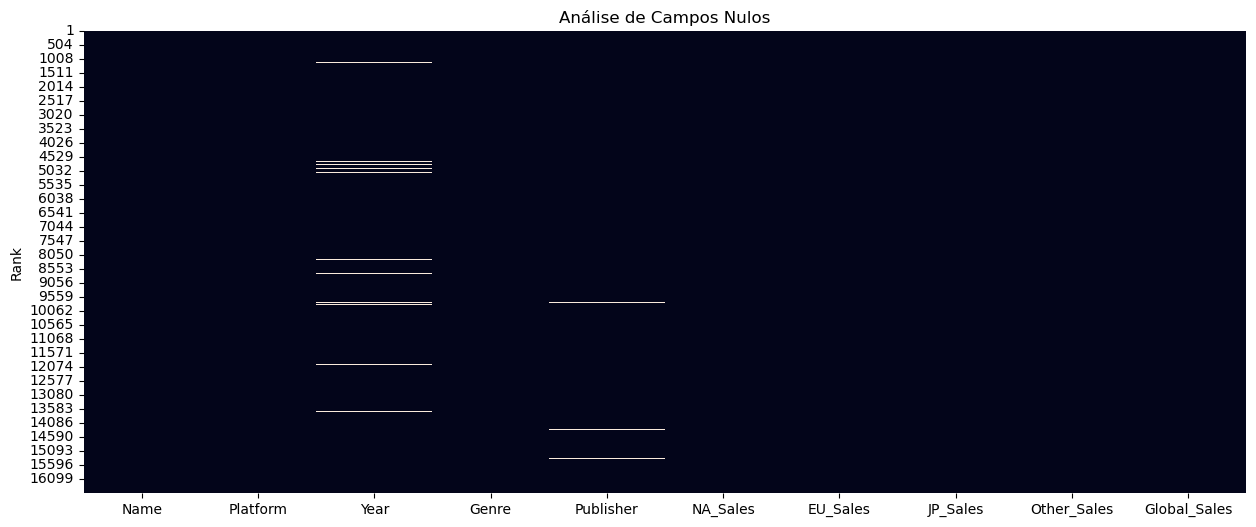

In [6]:
# Gráfico de distribuição dos valores Nulos
plt.figure(figsize=(15,6))
plt.title('Análise de Campos Nulos')
sns.heatmap(df.isnull(), cbar=False);

In [7]:
# Exibe as linhas que possuem, ao menos, um valor nulo
df[df.isna().any(axis=1)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...
16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01
16496,The Smurfs,3DS,NaN,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16497,Legends of Oz: Dorothy's Return,3DS,2014.0,Puzzle,NaN,0.00,0.01,0.00,0.00,0.01


In [8]:
# Quantidade de Linhas com, ao menos, um valor nulo
df[df.isna().any(axis=1)].shape

(307, 10)

In [9]:
# Apaga as linhas que possuem, ao menos, um valor nulo
df.dropna(inplace=True)

In [10]:
# Exibe os tipos de dados por colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16291 non-null  object 
 1   Platform      16291 non-null  object 
 2   Year          16291 non-null  float64
 3   Genre         16291 non-null  object 
 4   Publisher     16291 non-null  object 
 5   NA_Sales      16291 non-null  float64
 6   EU_Sales      16291 non-null  float64
 7   JP_Sales      16291 non-null  float64
 8   Other_Sales   16291 non-null  float64
 9   Global_Sales  16291 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


In [11]:
# Reseta a sequência numérica dos Indices do banco de dados
df.reset_index(drop=True, inplace=True)
display(df)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16286,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16287,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16288,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16289,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Será necessária conversão dos dados 'Year' para inteiro

In [12]:
# Converte os dados 'Year' para Inteiro
df['Year'] = df['Year'].convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16291 entries, 0 to 16290
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16291 non-null  object 
 1   Platform      16291 non-null  object 
 2   Year          16291 non-null  Int64  
 3   Genre         16291 non-null  object 
 4   Publisher     16291 non-null  object 
 5   NA_Sales      16291 non-null  float64
 6   EU_Sales      16291 non-null  float64
 7   JP_Sales      16291 non-null  float64
 8   Other_Sales   16291 non-null  float64
 9   Global_Sales  16291 non-null  float64
dtypes: Int64(1), float64(5), object(4)
memory usage: 1.3+ MB


In [13]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Informações da coluna 'Name'

In [14]:
# Valores Únicos
df['Name'].value_counts()

Name
Need for Speed: Most Wanted    12
FIFA 14                         9
Ratatouille                     9
LEGO Marvel Super Heroes        9
Cars                            8
                               ..
PGA Tour 96                     1
Game & Wario                    1
Angry Birds                     1
Shadow Hearts: Covenant         1
Know How 2                      1
Name: count, Length: 11325, dtype: int64

### Informações coluna 'Plataform'

In [19]:
# Valores Únicos
df['Platform'].value_counts()

Platform
DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

In [20]:
# Valores unicos 2
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [21]:
# Quantidade de vendas por plataforma
df.groupby('Platform').size()

Platform
2600     116
3DO        3
3DS      499
DC        52
DS      2131
GB        97
GBA      786
GC       542
GEN       27
GG         1
N64      316
NES       98
NG        12
PC       938
PCFX       1
PS      1189
PS2     2127
PS3     1304
PS4      336
PSP     1197
PSV      410
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii     1290
WiiU     143
X360    1234
XB       803
XOne     213
dtype: int64

In [29]:
# Exibindo os dados em forma de gráfico
x = df.groupby(['Platform'])['Platform'].count().index
y = df.groupby(['Platform'])['Platform'].count()

fig = px.scatter(x=x, y=y,
                 marginal_y='violin',
                 labels={
                     "y": "Volume de Vendas de Jogos",
                     "x": "Plataformas"
                 },
                 title='Venda de Jogos por Plataforma')
#fig.update_layout(yaxis_range=[0,2500])
fig.show()

In [30]:
df['Platform'].value_counts()['PS2']

2127

In [31]:
# Exibindo os dados em forma de gráfico
x = df.groupby(['Platform'])['Platform'].count().sort_values(ascending=False).index
y = df.groupby(['Platform'])['Platform'].count().sort_values(ascending=False)

fig = px.bar(x=x, y=y,
                 labels={
                     "y": "Volume de Vendas de Jogos",
                     "x": "Plataformas"
                 },
                 title='Venda de Jogos por Plataforma')
fig.show()

In [ ]:
# Para depois...
# Exibindo os dados em forma de gráfico
#fig = px.pie(df, values=df.index, names='Platform', title='Distribuição por Plataforma')
#fig = px.scatter(df, x='Platform', title='Distribuição por Plataforma', color='Publisher', marginal_x="histogram")
#fig.update_traces(marker_size=10)
#fig.update_layout(scattermode="group", scattergap=0.75)
#fig.show()

### Informações da coluna 'Year'

In [32]:
# Exibir as linhas em que a variável 'Year' está nula com valores nulos
df[df['Year'].isna()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


In [33]:
# Quantidade de registros de vendas por ano
df['Year'].value_counts()

Year
2009    1431
2008    1428
2010    1257
2007    1201
2011    1136
2006    1008
2005     936
2002     829
2003     775
2004     744
2012     655
2015     614
2014     580
2013     546
2001     482
1998     379
2000     349
2016     342
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
2017       3
2020       1
Name: count, dtype: Int64

In [34]:
df['Year'].unique()

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2003, 1986, 2000, 1995, 2016, 1991, 1981, 1987, 1980, 1983, 2020, 2017]
Length: 39, dtype: Int64

In [45]:
# Distribuição de vendas ao longo dos anos
x = df.groupby(['Year'])['Year'].count().index
y = df.groupby(['Year'])['Year'].count()

#x=sorted(df['Year'].unique())
#y=df['Year'].value_counts().sort_index()

fig = px.line(x=x, y=y,
            labels={
                "y": "Volume de Vendas de Jogos",
                "x": "Anos"},
            title='Venda de Jogos ao longo dos anos',
            line_shape='spline',
            markers=True)
fig.update_layout(xaxis_range=[1980,2020])
fig.show()

### Informações da coluna 'Genre'

In [46]:
# Contagem de Gênero de jogos vendidos
sorted(df['Genre'].unique())

['Action',
 'Adventure',
 'Fighting',
 'Misc',
 'Platform',
 'Puzzle',
 'Racing',
 'Role-Playing',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy']

In [47]:
df['Genre'].value_counts().sort_index()

Genre
Action          3251
Adventure       1274
Fighting         836
Misc            1686
Platform         875
Puzzle           570
Racing          1225
Role-Playing    1470
Shooter         1282
Simulation       848
Sports          2304
Strategy         670
Name: count, dtype: int64

In [63]:
# Distribuição de vendas ao longo dos anos
x = df.groupby(['Genre'])['Genre'].count().sort_values(ascending=False).index # Nomes (names)
y = df.groupby(['Genre'])['Genre'].count().sort_values(ascending=False) # Quantidade (values)

fig = px.pie(values=y, names=x,
                 title='Venda de Jogos por Gênero')
fig.show()

### Informações da Variável 'Publisher'

In [49]:
# Contagem por Desenvolvedoras
sorted(df['Publisher'].unique())

['10TACLE Studios',
 '1C Company',
 '20th Century Fox Video Games',
 '2D Boy',
 '3DO',
 '49Games',
 '505 Games',
 '5pb',
 '7G//AMES',
 '989 Sports',
 '989 Studios',
 'AQ Interactive',
 'ASC Games',
 'ASCII Entertainment',
 'ASCII Media Works',
 'ASK',
 'Abylight',
 'Acclaim Entertainment',
 'Accolade',
 'Ackkstudios',
 'Acquire',
 'Activision',
 'Activision Blizzard',
 'Activision Value',
 'Adeline Software',
 'Aerosoft',
 'Agatsuma Entertainment',
 'Agetec',
 'Aksys Games',
 'Alawar Entertainment',
 'Alchemist',
 'Alternative Software',
 'Altron',
 'Alvion',
 'American Softworks',
 'Angel Studios',
 'Answer Software',
 'Aqua Plus',
 'Aques',
 'Arc System Works',
 'Arena Entertainment',
 'Aria',
 'Arika',
 'ArtDink',
 'Aruze Corp',
 'Ascaron Entertainment',
 'Ascaron Entertainment GmbH',
 'Asgard',
 'Asmik Ace Entertainment',
 'Asmik Corp',
 'Aspyr',
 'Astragon',
 'Asylum Entertainment',
 'Atari',
 'Athena',
 'Atlus',
 'Avalon Interactive',
 'Avanquest',
 'Avanquest Software',
 'Axela'

In [50]:
# Contagem por Desenvolvedoras
df['Publisher'].value_counts().sort_index()

Publisher
10TACLE Studios                  3
1C Company                       3
20th Century Fox Video Games     5
2D Boy                           1
3DO                             36
                                ..
id Software                      1
imageepoch Inc.                  2
inXile Entertainment             1
mixi, Inc                        1
responDESIGN                     2
Name: count, Length: 576, dtype: int64

Para melhorar a visualização, mostrar apenas as desenvolvedoras com maior volume de jogos vendidos.

In [54]:
x=df['Publisher'].value_counts().sort_index()
y=sorted(df['Publisher'].unique())

fig = px.bar(x=x, y=y,
                orientation='h',
                labels={
                    "x": "Quantidade de Vendas",
                    "y": "Plataforma de Publicação"
                },
                title='Venda de Jogos por Plataforma de Publicação')
fig.show()

### Verificação das vendas 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales' e 'Global_Sales'

Sugestões de análises:
* Taxa de Variação de Preço por Plataforma
* Média de Preços por jogos ou plataformas

In [55]:
df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,41.49,29.02,3.77,8.46,82.74
1,29.08,3.58,6.81,0.77,40.24
2,15.85,12.88,3.79,3.31,35.82
3,15.75,11.01,3.28,2.96,33.00
4,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...
16286,0.01,0.00,0.00,0.00,0.01
16287,0.01,0.00,0.00,0.00,0.01
16288,0.00,0.00,0.00,0.00,0.01
16289,0.00,0.01,0.00,0.00,0.01


In [64]:
# Média das Colunas
df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].mean()

NA_Sales        0.265647
EU_Sales        0.147731
JP_Sales        0.078833
Other_Sales     0.048426
Global_Sales    0.540910
dtype: float64

In [65]:
# Média das Linhas
df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].mean(axis=1)

0        33.096
1        16.096
2        14.330
3        13.200
4        12.550
          ...  
16286     0.004
16287     0.004
16288     0.002
16289     0.004
16290     0.004
Length: 16291, dtype: float64

## Exporta a Base de Dados

In [ ]:
# Exporta o Banco de Dados
df.to_csv(r'vgsales-bd-tratado.csv', index=False, encoding='utf-8')